In [49]:
import pandas as pd
%matplotlib inline

import matplotlib

In [2]:
coupon_details = pd.read_csv("coupon_detail_train.csv")

In [9]:
coupon_details.columns

Index([u'ITEM_COUNT', u'I_DATE', u'SMALL_AREA_NAME', u'PURCHASEID_hash',
       u'USER_ID_hash', u'COUPON_ID_hash'],
      dtype='object')

In [3]:
len(coupon_details)

168996

In [4]:
coupon_list = pd.read_csv("coupon_list_train.csv")

In [11]:
coupon_list.columns

Index([u'CAPSULE_TEXT', u'GENRE_NAME', u'PRICE_RATE', u'CATALOG_PRICE',
       u'DISCOUNT_PRICE', u'DISPFROM', u'DISPEND', u'DISPPERIOD', u'VALIDFROM',
       u'VALIDEND', u'VALIDPERIOD', u'USABLE_DATE_MON', u'USABLE_DATE_TUE',
       u'USABLE_DATE_WED', u'USABLE_DATE_THU', u'USABLE_DATE_FRI',
       u'USABLE_DATE_SAT', u'USABLE_DATE_SUN', u'USABLE_DATE_HOLIDAY',
       u'USABLE_DATE_BEFORE_HOLIDAY', u'large_area_name', u'ken_name',
       u'small_area_name', u'COUPON_ID_hash'],
      dtype='object')

In [5]:
len(coupon_list)

19413

In [6]:
user_list = pd.read_csv("user_list.csv")

In [7]:
len(user_list)

22873

In [8]:
train = pd.merge(coupon_details,coupon_list)

In [10]:
df = pd.merge(train,user_list,left_on=u'USER_ID_hash',right_on=u'USER_ID_hash')

In [20]:
agg_sum = df.groupby(df.USER_ID_hash)[u'DISCOUNT_PRICE'].sum().reset_index()

In [21]:
agg_sum.columns =['USER_ID_hash','sum']

In [22]:
agg_avg = df.groupby(df.USER_ID_hash)[u'DISCOUNT_PRICE'].mean().reset_index()

In [23]:
agg_avg.columns =['USER_ID_hash','avg']

In [24]:
cp_agg_sum = pd.merge(coupon_details,agg_sum,how='left',on='USER_ID_hash')

In [25]:
cp_agg_sum_avg = pd.merge(cp_agg_sum,agg_avg,how='left',on='USER_ID_hash')

In [26]:
final_df = cp_agg_sum_avg[['USER_ID_hash', 'I_DATE','sum', 'avg']]

In [27]:
final_df.head()

USER_ID_hash               I_DATE    sum     avg
0  d9dca3cb44bab12ba313eaa681f663eb  2012-03-28 15:06:06   1575  1575.0
1  560574a339f1b25e57b0221e486907ed  2011-07-04 23:52:54  25120  1570.0
2  560574a339f1b25e57b0221e486907ed  2011-07-16 00:52:49  25120  1570.0
3  560574a339f1b25e57b0221e486907ed  2011-07-16 00:54:53  25120  1570.0
4  560574a339f1b25e57b0221e486907ed  2011-07-16 00:55:52  25120  1570.0

In [29]:
final_df.columns = ['id','date','revenue_sum','revenue_avg']

In [30]:
final_df.to_csv("final_data_for_csv.csv")

In [104]:
final_df.head()

id                 date  revenue_sum  \
0  d9dca3cb44bab12ba313eaa681f663eb  2012-03-28 15:06:06         1575   
1  560574a339f1b25e57b0221e486907ed  2011-07-04 23:52:54        25120   
2  560574a339f1b25e57b0221e486907ed  2011-07-16 00:52:49        25120   
3  560574a339f1b25e57b0221e486907ed  2011-07-16 00:54:53        25120   
4  560574a339f1b25e57b0221e486907ed  2011-07-16 00:55:52        25120   

   revenue_avg  
0       1575.0  
1       1570.0  
2       1570.0  
3       1570.0  
4       1570.0

In [177]:
transaction_data = final_df

In [ ]:
final_df.

In [178]:
transaction_data.head()

id                 date  revenue_sum  \
0  d9dca3cb44bab12ba313eaa681f663eb  2012-03-28 15:06:06         1575   
1  560574a339f1b25e57b0221e486907ed  2011-07-04 23:52:54        25120   
2  560574a339f1b25e57b0221e486907ed  2011-07-16 00:52:49        25120   
3  560574a339f1b25e57b0221e486907ed  2011-07-16 00:54:53        25120   
4  560574a339f1b25e57b0221e486907ed  2011-07-16 00:55:52        25120   

   revenue_avg  
0       1575.0  
1       1570.0  
2       1570.0  
3       1570.0  
4       1570.0

In [179]:
len(transaction_data)

168996

In [144]:
#user_date = transaction_data[(transaction_data.id=='000cc06982785a19e2a2fdb40b1c9d59')]

In [180]:
without_duplicates = transaction_data.drop_duplicates('id')

In [181]:
len(without_duplicates)

22782

In [182]:
#from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

In [211]:
#Creating features
summary_df = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2012-06-23').reset_index()

In [184]:
summary_df.head()

id  frequency  recency      T
0  0000b53e182165208887ba65c079fc21        0.0      0.0  274.0
1  00035b86e6884589ec8d28fbf2fe7757        0.0      0.0   86.0
2  0005b1068d5f2b8f2a7c978fcfe1ca06        0.0      0.0  310.0
3  000cc06982785a19e2a2fdb40b1c9d59       17.0    324.0  354.0
4  0013518e41c416cd6a181d277dd8ca0b        2.0    179.0  237.0

In [185]:
len(summary_df)

22782

In [186]:
#final_df.sort('date',ascending=False)

In [187]:
#2011-07-01 00:10:42	 start date
#2012-06-23 23:54:47	 end date

In [212]:
#merge features with user data which contains monetory value
summary  = pd.merge(summary_df,without_duplicates)

In [189]:
summary.head()

id  frequency  recency      T  \
0  0000b53e182165208887ba65c079fc21        0.0      0.0  274.0   
1  00035b86e6884589ec8d28fbf2fe7757        0.0      0.0   86.0   
2  0005b1068d5f2b8f2a7c978fcfe1ca06        0.0      0.0  310.0   
3  000cc06982785a19e2a2fdb40b1c9d59       17.0    324.0  354.0   
4  0013518e41c416cd6a181d277dd8ca0b        2.0    179.0  237.0   

                  date  revenue_sum  revenue_avg  
0  2011-09-23 23:53:29         2980  2980.000000  
1  2012-03-29 10:31:59         1490  1490.000000  
2  2011-08-18 02:08:33        19900  9950.000000  
3  2011-07-05 20:18:36        29345  1397.380952  
4  2011-10-30 21:11:54        17400  4350.000000

In [190]:
len(summary)

22782

In [191]:
#Training algo 
#Basic Frequency/Recency analysis using the BG/NBD model

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 22782 subjects, a: 0.15, alpha: 21.38, b: 1.50, r: 0.56>


In [192]:
#from lifetimes.plotting import plot_frequency_recency_matrix

#plot_frequency_recency_matrix(bgf)

In [193]:
#from lifetimes.plotting import plot_probability_alive_matrix

#plot_probability_alive_matrix(bgf)

In [214]:
#Ranking customers from best to worst
t = 1
# “highest expected purchases in the next period” to lowest.
#Models expose a method that will predict a customer’s expected purchases in the next period using their history.

summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])

In [215]:
summary.sort_values(by='predicted_purchases').tail(5)

id  frequency  recency      T  \
8587   611d227e667a8b3c95647ba83c9098f7       23.0     68.0   69.0   
15382  ab8e19a4da7231b76af73fe7acb20dd6       41.0    143.0  146.0   
8841   63d5d0b93ea70b476490896b732e9723       42.0    141.0  146.0   
18921  d3c9c64c121c339e340a3a508e5eefad       30.0     79.0   80.0   
12534  8bfc390f5e89a1e0f511072ee5d5bc4c       41.0    121.0  121.0   

                      date  revenue_sum  revenue_avg  predicted_purchases  
8587   2012-04-15 21:48:15       149122  2330.031250             0.203245  
15382  2012-01-29 22:43:56       100535  1933.365385             0.214520  
8841   2012-01-29 14:47:47       219442  4668.978723             0.218624  
18921  2012-04-04 12:47:59        94307  2050.152174             0.238989  
12534  2012-02-23 02:50:48       124516  2146.827586             0.246160

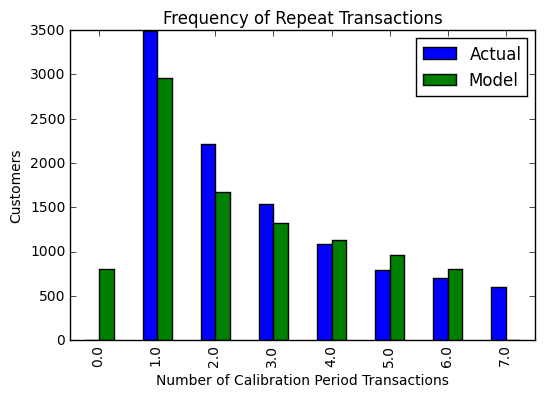

In [216]:
#Testing model 
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [217]:
#With transactional data, 
#we can partition the dataset into a calibration period dataset(training) and a holdout dataset(Test dataset)

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'id', 'date',
                                        calibration_period_end='2012-03-23',
                                        observation_period_end='2012-06-23' )   

In [218]:
print(summary_cal_holdout.head())

                                  frequency_cal  recency_cal  T_cal  \
id                                                                    
0000b53e182165208887ba65c079fc21            0.0          0.0  182.0   
0005b1068d5f2b8f2a7c978fcfe1ca06            0.0          0.0  218.0   
000cc06982785a19e2a2fdb40b1c9d59           13.0        170.0  262.0   
0013518e41c416cd6a181d277dd8ca0b            1.0         10.0  145.0   
001acdee812a18acfd7509172bed5700            7.0        239.0  263.0   

                                  frequency_holdout  duration_holdout  
id                                                                     
0000b53e182165208887ba65c079fc21                0.0                92  
0005b1068d5f2b8f2a7c978fcfe1ca06                0.0                92  
000cc06982785a19e2a2fdb40b1c9d59                4.0                92  
0013518e41c416cd6a181d277dd8ca0b                1.0                92  
001acdee812a18acfd7509172bed5700                4.0                92 

In [ ]:
#With this dataset, we can perform fitting on the _cal columns, 
#and test on the _holdout columns:


In [221]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
#Training
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])


<lifetimes.BetaGeoFitter: fitted with 20138 subjects, a: 0.18, alpha: 21.33, b: 1.75, r: 0.60>

In [222]:
#Testing
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [ ]:
#Estimating customer lifetime value using the Gamma-Gamma model


In [201]:
returning_customers_summary = summary[summary['frequency']>0]
returning_customers_summary = returning_customers_summary[returning_customers_summary['revenue_avg']>0]
print(returning_customers_summary.head())

                                 id  frequency  recency      T  \
3  000cc06982785a19e2a2fdb40b1c9d59       17.0    324.0  354.0   
4  0013518e41c416cd6a181d277dd8ca0b        2.0    179.0  237.0   
5  001acdee812a18acfd7509172bed5700       11.0    338.0  355.0   
8  0025cae7997d25ea5cf8851bb099c798        7.0    197.0  233.0   
9  002822059a01d895fad84f2f2ff5c1f1        1.0      9.0   69.0   

                  date  revenue_sum  revenue_avg  predicted_purchases  
3  2011-07-05 20:18:36        29345  1397.380952             0.045122  
4  2011-10-30 21:11:54        17400  4350.000000             0.008900  
5  2011-07-04 21:58:25        17540  1349.230769             0.030052  
8  2011-11-03 21:10:38        19560  2173.333333             0.027963  
9  2012-04-15 10:08:33         4480  2240.000000             0.011175  


In [223]:
#The Gamma-Gamma model and the independence assumption
#Gamma-Gamma model assumes that there is no relationship between the monetary value and the purchase frequency
returning_customers_summary[['revenue_avg', 'frequency']].corr()

revenue_avg  frequency
revenue_avg     1.000000   0.076898
frequency       0.076898   1.000000

In [224]:
#At this point we can train our Gamma-Gamma submodel and predict the conditional,
#expected average lifetime value of our customers.

from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['revenue_avg'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 15886 subjects, p: 0.83, q: 5.58, v: 13135.27>


In [225]:
#We can now estimate the average transaction value:
print(ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['revenue_avg']
    ).head(10))

3     1638.690569
4     2906.589645
5     1694.297828
8     2265.652919
9     2360.946574
10    3533.012616
11    1794.193354
12    2136.843176
14    1809.573622
15    1864.679304
dtype: float64


In [207]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['revenue_avg']
    ).mean(),
    returning_customers_summary[returning_customers_summary['frequency']>0]['revenue_avg'].mean()
))

Expected conditional average profit: 2379.84350362, Average profit: 2247.9499245


In [227]:
#CLV using the DCF method 
bgf.fit(returning_customers_summary['frequency'], returning_customers_summary['recency'], returning_customers_summary['T'])

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    returning_customers_summary['frequency'],
    returning_customers_summary['recency'],
    returning_customers_summary['T'],
    returning_customers_summary['revenue_avg'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

3     23510.988831
4     10337.594107
5     16810.178192
8     20709.140720
9      7169.676721
10    32707.647834
11     9830.404556
12     2366.108057
14    12461.612981
15     9977.780227
Name: clv, dtype: float64
